In [1]:
import pandas as pd 

In [2]:
house=pd.read_csv('housing.csv')

In [3]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df=pd.DataFrame(house)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
missing_values = df.isnull().sum()
data_types = df.dtypes
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

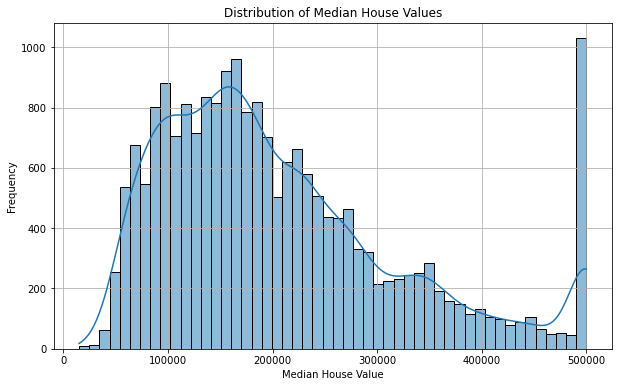

<ipython-input-7-a2d253f0bc5a>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


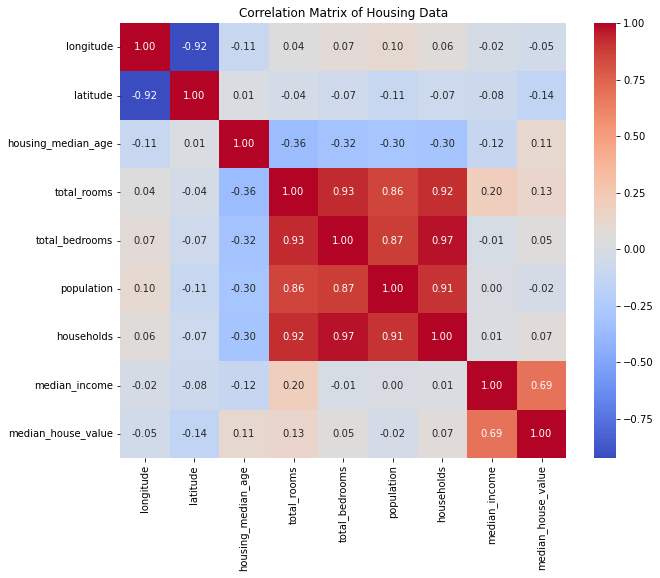

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values in 'total_bedrooms' with the median
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Convert 'ocean_proximity' to a categorical data type
df['ocean_proximity'] = df['ocean_proximity'].astype('category')


# Summary statistics
summary_statistics = df.describe()

# Distribution of median house values
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Housing Data')
plt.show()

summary_statistics


```Findings for Week 1```


- The distribution of median house values is skewed to the right, indicating that most houses are valued on the lower end of the spectrum, with a few outliers on the higher end.

- The correlation matrix heatmap reveals how different features relate to each other. For instance, median income appears to have a positive correlation with median house value, suggesting that as income increases, house values tend to increase as well.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

housing_data=pd.read_csv('housing.csv')

housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median(), inplace=True)

X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

categorical_features = ['ocean_proximity']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, X.select_dtypes(include=['int64', 'float64']).columns.tolist()),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=50))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=50))
])

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

In [23]:
# Evaluation metrics

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
nae = np.mean(np.abs((y_test - y_pred) / y_test))
explained_var = explained_variance_score(y_test, y_pred)
median_abs_err = median_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error = {rmse}')
print(f'Mean Squared Error = {mse}')
print(f'R^2 = {r_squared}')
print(f'Normalized Absolute Error (NAE) = {nae}')
print(f'Explained Variance Score = {explained_var}')
print(f'Median Absolute Error = {median_abs_err}')

Root Mean Squared Error = 50022.87099332999
Mean Squared Error = 2502287622.415335
R^2 = 0.8073835569915695
Normalized Absolute Error (NAE) = 0.18183450115890898
Explained Variance Score = 0.8075392078284946
Median Absolute Error = 19834.005000000005


The Random Forest model, with default parameters, achieved a Root Mean Squared Error (RMSE) of approximately $50,022.87 on the test set. This indicates the average deviation of the predicted median house values from the actual values in the dataset. Considering the scale of the median_house_value variable, which ranges into hundreds of thousands, an RMSE of this magnitude suggests that the model has a reasonable level of predictive accuracy, but there's definitely room for improvement. The MSE for this model is 2,502,287,622.415, which is a large number, but that is to be expected given the magnitude of the house values. The R^2 for this model is 0.807, meaning that about 81% of the variance in the data is explained by our model. The R^2 is fairly high, showing that our model displays a fair amount of accuracy. This is confirmed by the Normalized Absolute Error (NAE), Explained Variance Score, and Median Absolute Error, which are 0.1818, 0.8075, and 19834.005, respectively. The Explained Variance Score and Median Absolute Error are both fairly large, and the NAE is fairly small, showing that the Random Forest Model has a viable amount of accuracy.

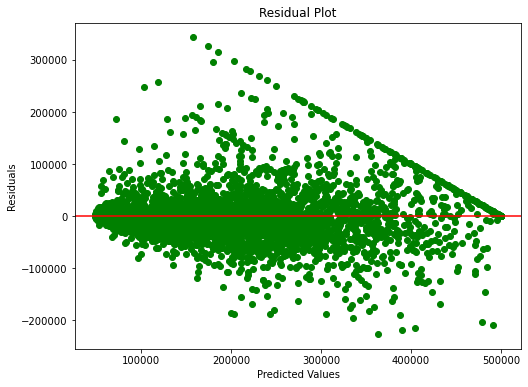

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred, color='green')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Looking at this residual plot, it appears that the points are roughly scattered around 0 with no clear pattern. There is one row of points that appears to show a negative linear relationship, which would indicate that there is a hard upper limit on the median house price. While this might be problematic with small sample sizes, we can acknowledge that the plot shows only slight bias as we are working with a very large sample.

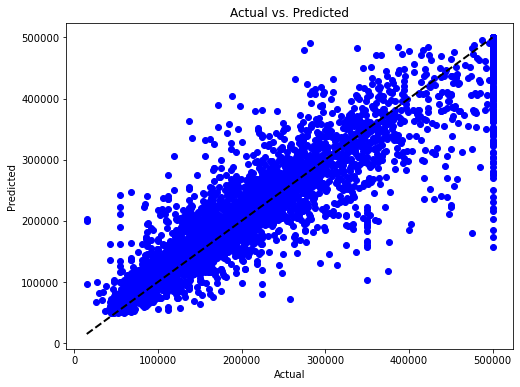

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

Looking at the plot of actual values minus predicted values, there is a roughly linear trend among the points about the line   y = x. Again, as we saw with the residual plot, there is a line of points directly at $500,000, indicating that we have an upper bound for the median house price that was not completely captured by our Random Forest prediction model. However, as mentioned above, we are working with a large data set, so the amount of bias due to this is fairly small.

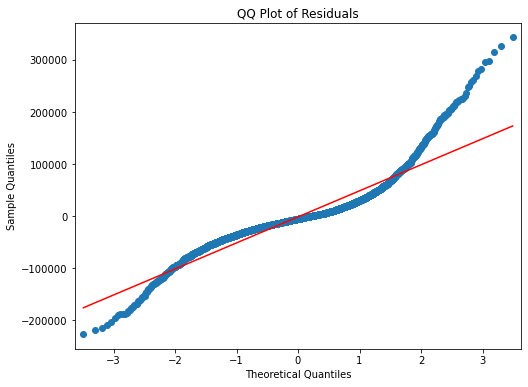

In [15]:
from statsmodels.graphics.gofplots import qqplot
residuals = y_test - y_pred
fig, ax = plt.subplots(figsize=(8, 6))
qqplot(residuals, line='s', ax=ax)
ax.set_title('QQ Plot of Residuals')
plt.show()

Looking at this Normal QQ plot, the points do not necessarily follow the shown red line. However, we can see that the points look like they roughly follow a normal distribution. Additionally, the data appears to be heavy tailed shown by the sharper slopes at the left side of the plot and the right side of the plot. However, due to the large sample size for the data set, this Normal QQ plot shows fairly expected data. 

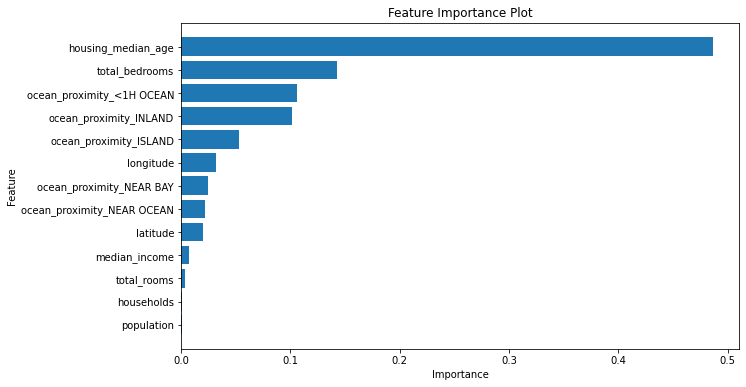

In [16]:
feature_importances = random_forest_model.named_steps['regressor'].feature_importances_
encoded_categorical_features = random_forest_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)
all_feature_names = np.concatenate([encoded_categorical_features, X.columns.drop(categorical_features)])
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()
plt.show()

Looking at the feature importance plot, it is clear that median income of an area is the most important predictor of the median house value. Other values that are important are if a house is inland, longitude, and latitude.